<img src='https://www.di.uniroma1.it/sites/all/themes/sapienza_bootstrap/logo.png' width="200"/> 

# Part 1.4 - REs and Finite State Automata

In Natural Language Processing (`NLP`), Finite Automata play a crucial role in recognizing and processing patterns within text. They are used to model the sequence of states and transitions that a system undergoes in response to a string of inputs, making them particularly effective for tasks like lexical analysis, tokenization, and syntax parsing. The theory of Finite Automata is deeply intertwined with Regular Expressions (`Regex`), as every regular expression can be converted into an equivalent finite automaton, and vice versa. This relationship is significant because it provides a formal and efficient way to implement `Regex` patterns using finite state machines. By understanding Finite Automata, Parham can gain insight into how `Regex` operates at a fundamental level, allowing him to better grasp how patterns are matched and how text is processed in various NLP tasks.

### **Objectives:** 

By the end of this notebook, Parham will have learned the theory of Finite Automata and how to apply it in code. He will leverage the well-known Python library, `automata-lib`, to gain hands-on experience with the `Automaton` class. Finally, Parham will use the available functions of the library to convert finite automata patterns into `Regex` patterns.

### **References**: 
- [https://pypi.org/project/automata-lib/6.0.2/](https://pypi.org/project/automata-lib/6.0.2/)
- [https://www.geeksforgeeks.org/designing-finite-automata-from-regular-expression-set-1/](https://www.geeksforgeeks.org/designing-finite-automata-from-regular-expression-set-1/)
- [https://www.cl.cam.ac.uk/teaching/1213/RLFA/reglfa-notes.pdf](https://www.cl.cam.ac.uk/teaching/1213/RLFA/reglfa-notes.pdf)

### **Tutors**:
- Professor Stefano Farali
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: Stefano.faralli@uniroma1.it
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/stefano-faralli-b1183920/) 
- Professor Iacopo Masi
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: masi@di.uniroma1.it  
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/iacopomasi/)  
    - <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Github-desktop-logo-symbol.svg" alt="Logo" width="20" height="20"> **GitHub**: [GitHub](https://github.com/iacopomasi)  
    
### **Contributors**: 
- Parham Membari
    - <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Gmail_icon_%282020%29.svg" alt="Logo" width="20" height="20"> **Email**: p.membari96@gmail.com
    - <img src="https://www.iconsdb.com/icons/preview/red/linkedin-6-xxl.png" alt="Logo" width="20" height="20"> **LinkedIn**: [LinkedIn](https://www.linkedin.com/in/p-mem/)
    - <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Github-desktop-logo-symbol.svg" alt="Logo" width="20" height="20"> **GitHub**:  [GitHub](https://github.com/parham075)
    - <img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Medium_logo_Monogram.svg" alt="Logo" width="20" height="20"> **Medium**: [Medium](https://medium.com/@p.membari96)

**Table of Contents:**

1. Import Libraries
2. Introduction to the Theory of Finite Automata
3. Class Automaton
4. Regular Expressions
5. Closing Thoughts


## 1. Import Libraries

In [1]:
!pip install 'automata-lib[visual]'

  Using cached automata_lib-9.0.0-py3-none-any.whl (125 kB)
  Using cached cached_method-0.1.0-py3-none-any.whl (4.2 kB)
  Using cached coloraide-4.3-py3-none-any.whl (245 kB)
  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp310-cp310-linux_x86_64.whl size=98060 sha256=65d59a9a0dc1e3285904cd216b28a163b9c91842be3a36071fc3e8adcc424403
  Stored in directory: /home/lorenzo/.cache/pip/wheels/61/ab/cd/e24a22c32830b8b4948c8887d8714d399f0f806f206a034698
Successfully built pygraphviz


In [2]:
import os
import sys
import numpy as np
import pandas as pd
from loguru import logger
import automata
from automata.base.automaton import Automaton
from automata.fa.dfa import DFA
from automata.fa.fa import FA
from automata.fa.nfa import NFA
from automata.fa.gnfa import GNFA
from automata.pda.dpda import DPDA 
from automata.pda.npda import NPDA
from automata.tm.ntm import NTM
from automata.tm.mntm import MNTM
import string
import automata.regex as re
import automata.base.exceptions as exceptions
import automata.tm.exceptions as tm_exceptions

## 2. Introduction to the Theory of Finite Automata

Finite Automata are a foundational concept in computer science, particularly within formal language theory and natural language processing (NLP). A Finite Automaton is a simple computational model designed to recognize patterns within input data, making it crucial for tasks such as lexical analysis, pattern matching, and syntax parsing. Essentially, a Finite Automaton is an abstract machine that processes a sequence of input symbols, transitioning through a series of states according to a predefined set of rules. The machine comprises the following key components:

- **A finite set of states**: These represent the various configurations in which the machine can exist.
- **An input alphabet**: A finite set of symbols that the machine can read and process.
- **A transition function**: This defines how the machine moves from one state to another based on the current input symbol.
- **A start state**: The initial state where the machine begins processing the input.
- **Accepting (final) states**: Specific states that determine if the input is accepted (i.e., if the pattern is recognized) when the machine finishes processing.

There are two primary types of Finite Automata:

- **Deterministic Finite Automaton (DFA)**: In a DFA, each state has exactly one transition for each possible input symbol. This ensures that for any given state and input, the next state is uniquely determined.

- **Non-deterministic Finite Automaton (NFA)**: In an NFA, a state may have multiple transitions for the same input symbol or may transition to a new state without consuming any input (ε-transitions). This non-determinism allows the NFA to explore multiple computational paths simultaneously.

### Example: A Deterministic Finite Automaton (DFA)

Consider a system designed to detect a specific sequence of heads (H) and tails (T) from a series of coin tosses. The system is particularly interested in identifying a sequence where tails occur in the last two flips:

`sequence = (H , T)* TT`

The goal is to construct a state diagram that recognizes this sequence. The state diagram can be illustrated as follows:

<p align="center"><img src="./finite_auto_diagram.png" alt="Finite Automata Diagram" width="20%" height="4%" style="display: block; margin: 20px auto;"/></p>

In the diagram above, each symbol is defined as follows:
- **a** : "Ends with heads"
- **b** : "Ends with 1 tail"
- **c** : "Ends with 2 tails"
- **e** : "Error"
- **H** : Head
- **T** : Tail

Below is a simplified procedure that outlines how the system processes a sequence of heads (`H`) and tails (`T`) to detect when two consecutive tails (`TT`) occur:

- **Start at State `a`**:  
  - The initial state where the system begins.

- **If Input Symbol is `T`**:  
  - From State `a`:  
    - Transition to State `b`.
  - From State `b`:  
    - Transition to State `c` (final state).

- **If Input Symbol is `H`**:  
  - From Any State (`a`, `b`, or `c`):  
    - Transition back to State `a`.

- **If Input Symbol is not `H` or `T`**:  
  - From Any State (`a`, `b`, or `c`):  
    - Transition to State `e` (Error state).

- **If in State `c` (Final State)**:  
  - The sequence "TT" has been detected, meaning the system has recognized the pattern.

The transition table for such a system can be represented as follows:

| Current State / Inputs | H  | T  | Other |
|------------------------|----|----|-------|
| a                      | a  | b  | e     |
| b                      | a  | c  | e     |
| c                      | a  | c  | e     |

In the next section, the practitioner will implement this system in code.

In [3]:
# Define states and transitions for the finite automaton
states = ["Ends with heads", "Ends with 1 tails", "Ends with 2 tails", "Error"]
initial_state = states[0]
accepting_states = [states[2]]  # List of accepting states
input_alphabet = "HT"

# Transition table maps state indices to their respective transitions
transition_table = {
    0: [
        states[0], 
        states[1],
    ],  # From "Ends with heads", "H" -> state 0, "T" -> state 1
    1: [
        states[0],
        states[2],
    ],  # From "Ends with 1 tails", "H" -> state 0, "T" -> state 2
    2: [
        states[0],
        states[2],
    ],  # From "Ends with 2 tails", "H" -> state 0, "T" -> state 2
    3: [
        states[3], 
        states[3],
    ],  # From "Error", always stays in "Error"
}
error_state = states[3]


def return_next_state(current_state, current_input):
    """
    Given the current state and input, return the next state based on the transition table.
    """
    state_index = states.index(current_state)
    input_index = input_alphabet.index(current_input)
    
    return transition_table[state_index][input_index]


# Initialize the automaton's current state and the input sequence to process
current_state = initial_state
input_sequence = "HTTHTTTHTH"

# Dictionary to track the number of occurrences for each accepting state
accepting_state_info = {
    state: {"state_name": state, "count": 0} for state in accepting_states
}

# Process the input sequence
for current_input in input_sequence:
    sys.stdout.write(f"Current State: {current_state} | Input: {current_input}")
    if not (current_input in input_alphabet):
        current_state = error_state
    else:
        current_state = return_next_state(current_state, current_input)
    print(f"  ---> Next State: {current_state}")

    # Increment the count if the current state is an accepting state
    if current_state in accepting_states:
        accepting_state_info[current_state]["count"] += 1

# Output the results
print("\n********************\nSummary of Accepting States:\n********************")
for state, info in accepting_state_info.items():
    print(
        f"For accepting State: '{info['state_name']}' | Number of Occurrences: {info['count']}"
    )

Current State: Ends with heads | Input: H  ---> Next State: Ends with heads
Current State: Ends with heads | Input: T  ---> Next State: Ends with 1 tails
Current State: Ends with 1 tails | Input: T  ---> Next State: Ends with 2 tails
Current State: Ends with 2 tails | Input: H  ---> Next State: Ends with heads
Current State: Ends with heads | Input: T  ---> Next State: Ends with 1 tails
Current State: Ends with 1 tails | Input: T  ---> Next State: Ends with 2 tails
Current State: Ends with 2 tails | Input: T  ---> Next State: Ends with 2 tails
Current State: Ends with 2 tails | Input: H  ---> Next State: Ends with heads
Current State: Ends with heads | Input: T  ---> Next State: Ends with 1 tails
Current State: Ends with 1 tails | Input: H  ---> Next State: Ends with heads

********************
Summary of Accepting States:
********************
For accepting State: 'Ends with 2 tails' | Number of Occurrences: 3


## 3. Class Automation

The `Automata` library is a Python 3 package that provides implementations for various computational models, including finite automata, pushdown automata, and Turing machines. Within this library, the `Automation` class serves as an abstract base class for all automata, including Turing machines. Because `Automation` is a base class, it cannot be instantiated directly. Instead, it provides a foundation from which specific types of automata inherit their properties and behaviors.

In the cell below, Parham will define a function called `read_user_input` that takes an automaton object as its input. This function prompts the user to enter a string and then processes this input using two key methods from the `Automaton` class:

- **`read_input`**: This method reads the input string into the automaton, processing it according to the automaton's rules. If the input is invalid or rejected by the automaton, the method raises a `RejectionException`.

- **`accepts_input`**: This method checks whether the automaton accepts the input string. It returns a boolean value: `True` if the input is accepted, and `False` if it is rejected.

In the `read_user_input` function, if the automaton accepts the input, it prints "Accepted." If the input is rejected, it prints "Rejected" and then attempts to handle any exceptions that may occur during the process.


In [16]:
def read_user_input(automaton_obj, input_str=None):
    if not (input_str):
        input_str = input("Please enter your input: ")

    if automaton_obj.accepts_input(input_str=input_str):
        print(
            "Accepted |   ",
            "state: ",
            automaton_obj.read_input(input_str=str(input_str)),
        )
    else:
        print("Rejected")
        try:
            state = automaton_obj.read_input(input_str=input_str)
        except Exception as e:
            print(e)
    print("---------------------------------------------------------------")

### Deterministic Finite Automaton (DFA):

In the cell below, the practitioner will define a Deterministic Finite Automaton (DFA) to recognize a specific sequence. The DFA is designed to identify sequences that end with an odd number of consecutive `1`s.

The automaton begins in state `q0`. When it encounters a `1`, it transitions to state `q1`. If another `1` is encountered, it moves to state `q2`. The DFA continues toggling between states `q1` and `q2` depending on the sequence of `1`s. 

The DFA accepts a sequence if it ends in state `q1`, meaning the sequence concludes with exactly one `1` or an odd number of consecutive `1`s. Sequences that end with a `0` or an even number of consecutive `1`s do not reach an accepting state and are therefore not recognized by the system.


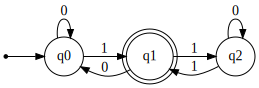

In [17]:
my_dfa = DFA(
    states={"q0", "q1", "q2"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q0", "1": "q1"},
        "q1": {"0": "q0", "1": "q2"},
        "q2": {"0": "q2", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q1"},
)
my_dfa.show_diagram()

Parham will pass the DFA system defined in the previous cell to the `read_user_input` function to determine whether the sequence will be accepted or rejected.

In [18]:
read_user_input(my_dfa, input_str="0")
read_user_input(my_dfa, input_str="01")
read_user_input(my_dfa, input_str="10")
read_user_input(my_dfa, input_str="11")
read_user_input(my_dfa, input_str="10")
read_user_input(my_dfa, input_str="11")
read_user_input(my_dfa, input_str="111")

Rejected
the DFA stopped on a non-final state (q0)
---------------------------------------------------------------
Accepted |    state:  q1
---------------------------------------------------------------
Rejected
the DFA stopped on a non-final state (q0)
---------------------------------------------------------------
Rejected
the DFA stopped on a non-final state (q2)
---------------------------------------------------------------
Rejected
the DFA stopped on a non-final state (q0)
---------------------------------------------------------------
Rejected
the DFA stopped on a non-final state (q2)
---------------------------------------------------------------
Accepted |    state:  q1
---------------------------------------------------------------


**Exercise:**

In a basic CPU, instructions are represented by 2-bit opcodes. The control unit, modeled as a Deterministic Finite Automaton (DFA), reads these opcodes to determine which operation to execute, such as load, store, add, or halt.

### DFA for a 2-Bit Instruction Decoder:

1. **States**:
   - The DFA has four states, each corresponding to one of the four possible instructions:
     - **`Load` (0)**: Load data from memory.
     - **`Store` (1)**: Store data to memory.
     - **`Add` (2)**: Add two values.
     - **`Halt` (3)**: Halt the operation.

2. **Input Symbols**:
   - The input symbols are 2-bit binary opcodes: `0`, `1`, `2`, and `3`.

3. **Initial and Accepting States**:
   - The initial state is the starting point where no operation has been selected.
   - Each of the states (`Load`, `Store`, `Add`, `Halt`) can be considered an accepting state because they represent valid operations.

4. **Input Sequence**:
   - The DFA processes sequences of inputs as shown below:
   ```python
   input_sequences = [
       '3',        # Should go to 'Halt' and be accepted
       '0', '1', '3',  # Should eventually go to 'Halt'
       '2', '3',        # Should go to 'Halt' from 'Add'
       '0', '1', '2', '3'  # Should eventually go to 'Halt'
   ]
   ```

### How It Works:
- The DFA begins in an initial state, waiting for an opcode input.
- Upon receiving a 2-bit opcode, it transitions to the corresponding operation state.
- For example:
  - If the input is `0`, it transitions to the `Load` state and generates control signals to perform a load operation.
  - If the input is `3`, it transitions to the `Halt` state, signaling the end of operations.

### Transition Table for the Instruction Decoder:

| Current State | Opcode (Input) | Next State | Operation       |
|---------------|----------------|------------|-----------------|
| `Start`       | `0`            | `Load`     | Load from memory|
| `Start`       | `1`            | `Store`    | Store to memory |
| `Start`       | `2`            | `Add`      | Add values      |
| `Start`       | `3`            | `Halt`     | Stop execution  |


In [19]:
# @title 🧑🏿‍💻 Your code here

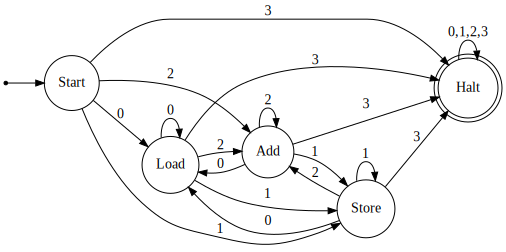

Testing sequence: 3
Accepted |    state:  Halt
---------------------------------------------------------------
Testing sequence: 0
Rejected
the DFA stopped on a non-final state (Load)
---------------------------------------------------------------
Testing sequence: 1
Rejected
the DFA stopped on a non-final state (Store)
---------------------------------------------------------------
Testing sequence: 3
Accepted |    state:  Halt
---------------------------------------------------------------
Testing sequence: 2
Rejected
the DFA stopped on a non-final state (Add)
---------------------------------------------------------------
Testing sequence: 3
Accepted |    state:  Halt
---------------------------------------------------------------
Testing sequence: 0
Rejected
the DFA stopped on a non-final state (Load)
---------------------------------------------------------------
Testing sequence: 1
Rejected
the DFA stopped on a non-final state (Store)
---------------------------------------------

In [22]:
# @title 👀 Solution
my_dfa = DFA(
    states={"Start", "Load", "Store", "Add", "Halt"},
    input_symbols={"0", "1", "2", "3"},
    transitions={
        "Start": {"0": "Load", "1": "Store", "2": "Add", "3": "Halt"},
        "Load": {"0": "Load", "1": "Store", "2": "Add", "3": "Halt"},
        "Store": {"0": "Load", "1": "Store", "2": "Add", "3": "Halt"},
        "Add": {"0": "Load", "1": "Store", "2": "Add", "3": "Halt"},
        "Halt": {"0": "Halt", "1": "Halt", "2": "Halt", "3": "Halt"},
    },
    initial_state="Start",
    final_states={"Halt"},
)

# Show the state diagram
display(my_dfa.show_diagram())
# Example input sequences that will be accepted by the DFA

input_sequences = [
    "3",  # Should go to 'Halt' and be accepted
    "0",
    "1",
    "3",  # Should eventually go to 'Halt'
    "2",
    "3",  # Should go to 'Halt' from 'Add'
    "0",
    "1",
    "2",
    "3",  # Should eventually go to 'Halt'
]

# Test the DFA with the input sequences
for sequence in input_sequences:
    print(f"Testing sequence: {sequence}")
    read_user_input(my_dfa, input_str=str(sequence))

### Nondeterministic Finite Automaton (NFA):

In the cell below, an `NFA` is defined to match strings that start with "a", end with "a", and do not contain consecutive "b"s. This NFA has three states: `q0`, `q1`, and `q2`.

- The automaton begins in the initial state `q0`.
  - Upon encountering an "a", it transitions to state `q1`.
  - In state `q1`, the NFA remains in `q1` for any additional "a" inputs, allowing the string to continue with "a"s.
  - If no further input is given, the automaton can non-deterministically move to state `q2`.
  - From `q2`, the NFA can transition back to `q0` upon reading a "b". This design prevents consecutive "b"s by forcing the automaton to restart the pattern matching process after each "b".
  
- The string is accepted if the automaton ends in state `q1`, ensuring that the string ends with an "a".

Here is the transition table for the NFA described above:

| Current State | Input | Next State(s)   |
|---------------|-------|-----------------|
| `q0`          | `a`   | `q1`            |
| `q0`          | `b`   | -               |
| `q1`          | `a`   | `q1`            |
| `q1`          | `b`   | -               |
| `q1`          | ε     | `q2`            |
| `q2`          | `a`   | -               |
| `q2`          | `b`   | `q0`            |


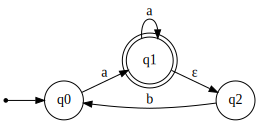

In [23]:
# NFA which matches strings beginning with "a", ending with "a", and
# containing no consecutive "b"s
my_nfa = NFA(
    states={"q0", "q1", "q2"},
    input_symbols={"a", "b"},
    transitions={
        "q0": {"a": {"q1"}},
        "q1": {"a": {"q1"}, "": {"q2"}},
        "q2": {"b": {"q0"}},
    },
    initial_state="q0",
    final_states={"q1"},
)
my_nfa.show_diagram()

**Exercise**

Your task is to design and implement an Nondeterministic Finite Automaton (NFA) that matches the transition table provided below. Ensure that your NFA accurately reflects the transitions described, including ε-transitions, and handles inputs over the alphabet `{0, 1}`.

Once you've implemented the NFA, test it with a variety of input sequences to verify its behavior and ensure it correctly follows the specified transitions.

### Transition Table

| Current State | Input 0 | Input 1     |
|---------------|---------|-------------|
| `q0`          | `q0`    | `q0`, `q1`  |
| `q1`          | `q2`    | `q3`        |
| `q2`          | ε       | `q3`        |
| `q3`          | `q3`    | `q3`        |

- **Initial State:** `q0`
- **Final State:** `q3`
- **Epsilon Transitions:** From `q2` on input `1`.


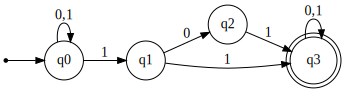

Testing sequence: 001
Rejected
the NFA stopped on all non-final states (q1, q0)
---------------------------------------------------------------
Testing sequence: 10
Rejected
the NFA stopped on all non-final states (q2, q0)
---------------------------------------------------------------
Testing sequence: 1001
Rejected
the NFA stopped on all non-final states (q1, q0)
---------------------------------------------------------------
Testing sequence: 0101
Accepted |    state:  frozenset({'q1', 'q0', 'q3'})
---------------------------------------------------------------
Testing sequence: 0001
Rejected
the NFA stopped on all non-final states (q1, q0)
---------------------------------------------------------------
Testing sequence: 000
Rejected
the NFA stopped on all non-final states (q0)
---------------------------------------------------------------
Testing sequence: 10
Rejected
the NFA stopped on all non-final states (q2, q0)
---------------------------------------------------------------
T

In [24]:
from automata.fa.nfa import NFA

# Define the NFA
my_nfa = NFA(
    states={"q0", "q1", "q2", "q3"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": {"q0"}, "1": {"q0", "q1"}},
        "q1": {"0": {"q2"}, "1": {"q3"}},
        "q2": {"1": {"q3"}},
        "q3": {"0": {"q3"}, "1": {"q3"}},
    },
    initial_state="q0",
    final_states={"q3"},
)

# Display the NFA diagram
display(my_nfa.show_diagram())

# Test the NFA with example input sequences
input_sequences = ["001", "10", "1001", "0101", "0001", "000", "10", "1110"]


for sequence in input_sequences:
    print(f"Testing sequence: {sequence}")
    read_user_input(my_nfa, input_str=str(sequence))

## 4. Regular Expressions

In theoretical computer science and formal language theory, a regular language (also called a rational language) is a type of formal language that can be precisely defined by a regular expression (`Regex`). While modern `Regex` engines often include additional features to recognize non-regular languages, the traditional `Regex` is limited to defining regular languages.

A regular language can also be characterized as one recognized by a finite automaton. This connection between regular expressions and finite automata is established by Kleene's theorem, which states that every regular expression corresponds to a finite automaton and vice versa.

While finite automata (specifically NFAs) do not inherently include methods for checking whether one NFA is a subset of another, this can be managed by converting regular expressions to NFAs. Through these conversions, it's possible to determine if the language recognized by one NFA is a subset of the language recognized by another.


In [26]:
from automata.fa.nfa import NFA


def is_subset(nfa1, nfa2):
    # In the following, we have nfa1 and nfa2 and want to determine whether
    # nfa1 is a subset of nfa2.

    # If taking the union of nfa2 with nfa1 is equal to nfa2 again,
    # nfa1 didn't accept any strings that nfa2 did not, so it is a subset.
    return nfa1.union(nfa2) == nfa2


alphabet = set(string.ascii_lowercase)

nfa1 = NFA.from_regex("abc", input_symbols=alphabet)
nfa2 = NFA.from_regex("(abc)|(def)", input_symbols=alphabet)
nfa3 = NFA.from_regex("a*bc", input_symbols=alphabet)

logger.info(f"nfa1 is subset of nfa2? | Answer: {is_subset(nfa1, nfa2)}")
logger.info(f"nfa1 is subset of nfa3? | Answer: {is_subset(nfa1, nfa2)}")
logger.info(f"nfa2 is subset of nfa3? | Answer: {is_subset(nfa1, nfa2)}")

2025-03-12 21:14:45.335 | INFO     | __main__:<module>:19 - nfa1 is subset of nfa2? | Answer: True
2025-03-12 21:14:45.339 | INFO     | __main__:<module>:20 - nfa1 is subset of nfa3? | Answer: True
2025-03-12 21:14:45.343 | INFO     | __main__:<module>:21 - nfa2 is subset of nfa3? | Answer: True


## 5. Closing Thoughts:


Through this Notebooks Parham performed the following activities:
- Acquired knowlege of how Finite Automata works.
- Applied different Finite Automata systems including DFA & NFA
- Validate if an NFA is a subset of another NFA using `Regex`
